# Lab 6: Introduction to Pandas
### Data Science for Biology
**Notebook developed by:** *Kinsey Long*<br>

### Learning Outcomes

In this notebook, you will practice:
* Examining DataFrames
* Indexing DataFrames
* Manipulating DataFrames
* Merging DataFrames

---
### Helpful Data Science Resources
Here are some resources you can check out while doing this notebook!

- [Data 8 Python Reference](https://www.data8.org/fa23/reference/)
- [DS4BIO Pandas Guide](pandas_guide.ipynb)
- Recommended activity: Map each Data 8 method to its corresponding Pandas method.
- [Data 100 Pandas Reference](https://ds100.org/su22/resources/assets/exams/su22/su22_final_reference_sheet.pdf)
- [Introductory documentation for pandas](https://pandas.pydata.org/docs/user_guide/10min.html)

### Peer Consulting

If you find yourself having trouble with any content in this notebook, Data Peer Consultants are an excellent resource! Click [here](https://dlab.berkeley.edu/training/frontdesk-info) to locate live help.

Peer Consultants are there to answer all data-related questions, whether it be about the content of this notebook, applications of data science in the world, or other data science courses offered at Berkeley.

---

Until this point, our journey through data manipulation has been guided by a custom library designed specifically for Data 8. The techniques we've learned in Data 8 serve as a foundation for what lies ahead—a transition to the versatile world of Pandas. Think of Pandas as the next level of our data manipulation adventure. While all the table methods familiarized in Data 8 seamlessly translate into Pandas, it's important to note that working with Pandas often introduces additional intricacies and considerations. This powerful Python library takes center stage in the realm of data wrangling and exploration, due to its distinctive table-like data type known as a DataFrame.

### 1. Examining DataFrames

First, we need to import the pandas library. It's most well-known abbreviated name is `pd`, which is what we will rename the library as.

In [98]:
#Just run this cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In this lab, we will be working with clinical and proteomic breast cancer data, generated by the Clinical Proteomic Tumor Analysis Consortium (NCI/NIH). Breast cancer samples were taken from 77 patients. Their clinical profile is stored in the dataset `clinical_data.csv`. The researchers did iTRAQ proteome profiling on all of samples, gathering expression values for ~12,000 proteins for each sample in the dataset `cancer_proteomics.csv`. 

<font color = #d14d0f>**QUESTION 1**:</font>
Import the `'clinical_data.csv'` into the DataFrame `clinical_data`.

In [99]:
# BEGIN SOLUTION
clinical_data = pd.read_csv('clinical_data.csv')
# END SOLUTION

In [100]:
clinical_data.shape

(77, 13)

<font color = #d14d0f>**QUESTION 2**:</font>
Display the first 5 rows of `clinical_data`.

In [101]:
# BEGIN SOLUTION
clinical_data.head()

# END SOLUTION

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Node,Node-Coded,Metastasis,AJCC Stage,Vital Status,Days to date of Death
0,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,N0,Negative,M0,Stage IIA,DECEASED,754.0
1,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,N1,Positive,M0,Stage IIB,DECEASED,1692.0
2,TCGA-A7-A0CE,FEMALE,57,Negative,Negative,Negative,T2,N0,Negative,M0,Stage IIA,LIVING,NaN
3,TCGA-D8-A142,FEMALE,74,Negative,Negative,Negative,T3,N0,Negative,M0,Stage IIB,LIVING,NaN
4,TCGA-AO-A0J6,FEMALE,61,Negative,Negative,Negative,T2,N0,Negative,M0,Stage IIA,LIVING,NaN


<font color = #d14d0f>**QUESTION 3**:</font>
How many patients are in `clinical_data`? Assign the value to `num_patients`.

In [102]:
num_patients = clinical_data.shape[0]

print(f"There are {num_patients} patients in our DataFrame.")

There are 77 patients in our DataFrame.


### 2. Indexing DataFrames

<font color = #d14d0f>**QUESTION 4a**:</font>
What is the difference between a pandas `Series` and `DataFrame`? What are some similarities?

**ANSWER:** A pandas series is a one-dimensional array-like structure whereas the pandas DataFrame is multi-dimensional, representing the data in a tabular format. Another corollary of such a statement is that the pandas series has a single axis(index) whereas DataFrame has two axes(col and row)

In terms of similarities, both have indexes that allow for easy access and manipulation of data. Both also share many methods like head() and describe().

<font color = #d14d0f>**QUESTION 4b**:</font>
Assign `diagnosis_age` to a pandas `Series` containing each patient's Age at Initial Pathologic Diagnosis.

In [103]:
# BEGIN SOLUTION NO PROMPT
diagnosis_age = clinical_data['Age at Initial Pathologic Diagnosis']
# END SOLUTION

In [104]:
#Should output true
type(diagnosis_age) == pd.Series

True

In [105]:
# Check Shape
diagnosis_age.shape

(77,)

<font color = #d14d0f>**QUESTION 4c**:</font>
Use indexing methods to assign `youngest_patient_diagnosis_age` to the youngest age at diagnosis in `clinical_data`.

In [106]:
youngest_patient_diagnosis_age = diagnosis_age.min()

print(f"The youngest patient at diagnosis is {youngest_patient_diagnosis_age}.")

The youngest patient at diagnosis is 30.


In [107]:
#should output true
youngest_patient_diagnosis_age in range(20, 40)

True

<font color = #d14d0f>**QUESTION 4d**:</font>
Plot and display a histogram showing the distribution of patient ages. Add appropriate labels and a title. Do not import any additional packages.

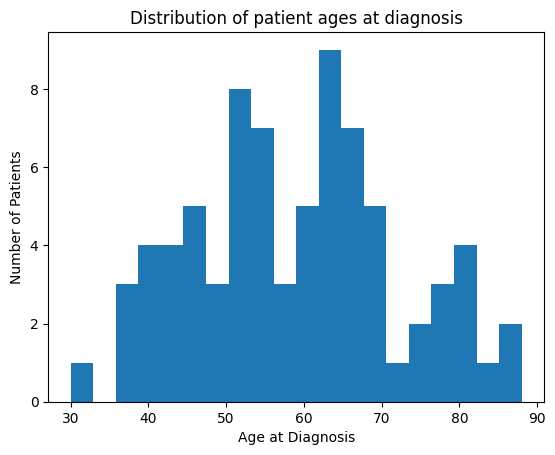

In [108]:
diagnosis_age.plot(kind='hist', bins=20)
plt.xlabel('Age at Diagnosis')
plt.ylabel('Number of Patients')
plt.title('Distribution of patient ages at diagnosis')
plt.show()

<font color = #d14d0f>**QUESTION 5**:</font>
What is the AJCC stage of the patient at row index 50? Assign the string result to `q5_answer`.

In [109]:
q5_answer =  clinical_data.loc[50, 'AJCC Stage']

print(f"The AJCC stage of the patient at row index 50 is {q5_answer}.")

The AJCC stage of the patient at row index 50 is Stage IIA.


In [110]:
#should output 9
len(q5_answer)

9

<font color = #d14d0f>**QUESTION 6**:</font>
Create a new DataFrame `selected_columns` with only the columns `'Gender'`, `'Age at Initial Pathologic Diagnosis'` and `'AJCC Stage'`.

In [111]:
selected_columns = clinical_data[['Gender', 'Age at Initial Pathologic Diagnosis', 'AJCC Stage']]

selected_columns.head(3) # DO NOT CHANGE THIS

,Gender,Age at Initial Pathologic Diagnosis,AJCC Stage
0,FEMALE,40,Stage IIA
1,FEMALE,56,Stage IIB
2,FEMALE,57,Stage IIA


Take a moment to familiarize yourself with [AJCC Stages](https://www.cancer.gov/about-cancer/diagnosis-staging/staging).

In [112]:
# Check shape should be (77,3)
selected_columns.shape

(77, 3)

### 3. Filtering and Manipulating DataFrames

<font color = #d14d0f>**QUESTION 7**:</font>
How many patients are at the AJCC Stage of 'Stage IIA'? Assign the value to `num_stage_2a`.

In [113]:
num_stage_2a = selected_columns[selected_columns['AJCC Stage'] == 'Stage IIA'].shape[0]

print(f"There are {num_stage_2a} patients at Stage IIA.")

There are 22 patients at Stage IIA.


In [114]:
(type(num_stage_2a) == int or type(num_stage_2a) == float)

True

In [115]:
# HIDDEN
num_stage_2a

22

In [116]:
clinical_data.head()

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Node,Node-Coded,Metastasis,AJCC Stage,Vital Status,Days to date of Death
0,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,N0,Negative,M0,Stage IIA,DECEASED,754.0
1,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,N1,Positive,M0,Stage IIB,DECEASED,1692.0
2,TCGA-A7-A0CE,FEMALE,57,Negative,Negative,Negative,T2,N0,Negative,M0,Stage IIA,LIVING,NaN
3,TCGA-D8-A142,FEMALE,74,Negative,Negative,Negative,T3,N0,Negative,M0,Stage IIB,LIVING,NaN
4,TCGA-AO-A0J6,FEMALE,61,Negative,Negative,Negative,T2,N0,Negative,M0,Stage IIA,LIVING,NaN


<font color = #d14d0f>**QUESTION 7a**:</font>
Assign the row corresponding to the youngest patient with a T2 type tumor to the variable `youngest_t2` as a Series.

In [117]:
t2_only =  clinical_data[clinical_data['Tumor'] == 'T2']
youngest_t2 =  t2_only.sort_values('Age at Initial Pathologic Diagnosis').iloc[0]
youngest_t2

Complete TCGA ID                       TCGA-BH-A0DG
Gender                                       FEMALE
Age at Initial Pathologic Diagnosis              30
ER Status                                  Positive
PR Status                                  Negative
HER2 Final Status                          Negative
Tumor                                            T2
Node                                             N0
Node-Coded                                 Negative
Metastasis                                       M0
AJCC Stage                                Stage IIA
Vital Status                                 LIVING
Days to date of Death                           NaN
Name: 50, dtype: object

In [118]:
type(youngest_t2) == pd.Series

True

In [119]:
#should output 13
len(youngest_t2)

13

In [120]:
clinical_data['Node'].unique()

array(['N0', 'N1', 'N2', 'N3'], dtype=object)

<font color = #d14d0f>**QUESTION 7b**:</font>
What is the Complete TCGA ID for the youngest patient with a T2 type tumor? Assign your answer to `youngest_t2_tcga_id`.

In [121]:
youngest_t2_tcga_id = youngest_t2['Complete TCGA ID']
print(f"The TCGA ID for the youngest patient with T2 type tumor is {youngest_t2_tcga_id}.")

The TCGA ID for the youngest patient with T2 type tumor is TCGA-BH-A0DG.


In [122]:
#should output true
type(youngest_t2_tcga_id) == str

True

<font color = #d14d0f>**QUESTION 8a**:</font>
How many patients have a T3	tumor and N0 node? Assign your answer to `num_t3_n0`.

In [123]:
num_t3_n0 = clinical_data[(clinical_data['Tumor'] == 'T3') & (clinical_data['Node'] == 'N0')].shape[0]

print(f"There are {num_t3_n0} patients with a T3 tumor and N0 node.")

There are 7 patients with a T3 tumor and N0 node.


In [124]:
#should output true
(type(num_t3_n0) == int or type(num_t3_n0) == float)

True

<font color = #d14d0f>**QUESTION 8b**:</font>
What does the node column mean?

**ANSWER:**
The node column represents the level of lymph node involvement in the cancer staging process

- N0: No regional lymph node involvement.
- N1: Regional lymph node involvement (typically a small number of lymph nodes).
- N2: More extensive regional lymph node involvement (more lymph nodes involved).
- N3: Even more extensive regional lymph node involvement (a large number of lymph nodes involved).

### 4. Grouping and Pivoting

<font color = #d14d0f>**QUESTION 9a**:</font>
Create a grouped DataFrame `grouped_AJCC_stage` showing the number of individuals at each AJCC Stage. Adapt the final DataFrame so that it only has two columns: `'AJCC Stage'` and `'count'`. 
> Hint: You may need to select and rename columns.

In [125]:
clinical_data.head()

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Node,Node-Coded,Metastasis,AJCC Stage,Vital Status,Days to date of Death
0,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,N0,Negative,M0,Stage IIA,DECEASED,754.0
1,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,N1,Positive,M0,Stage IIB,DECEASED,1692.0
2,TCGA-A7-A0CE,FEMALE,57,Negative,Negative,Negative,T2,N0,Negative,M0,Stage IIA,LIVING,NaN
3,TCGA-D8-A142,FEMALE,74,Negative,Negative,Negative,T3,N0,Negative,M0,Stage IIB,LIVING,NaN
4,TCGA-AO-A0J6,FEMALE,61,Negative,Negative,Negative,T2,N0,Negative,M0,Stage IIA,LIVING,NaN


In [126]:
grouped_AJCC_stage = clinical_data.groupby('AJCC Stage').size().reset_index()
grouped_AJCC_stage.rename(columns={0: 'count'}, inplace=True)
grouped_AJCC_stage

,AJCC Stage,count
0,Stage I,3
1,Stage IA,4
2,Stage IB,1
3,Stage II,9
4,Stage IIA,22
5,Stage IIB,18
6,Stage III,3
7,Stage IIIA,7
8,Stage IIIB,5
9,Stage IIIC,4


In [127]:
grouped_AJCC_stage.shape

(11, 2)

In [128]:
# HIDDEN
sorted(grouped_AJCC_stage.columns.to_list())

['AJCC Stage', 'count']

In [129]:
# HIDDEN
grouped_AJCC_stage.sort_values("count", ascending=False)["count"].to_list()

[22, 18, 9, 7, 5, 4, 4, 3, 3, 1, 1]

<font color = #d14d0f>**QUESTION 9b**:</font>
Create a grouped **Series** `grouped_AJCC_stage_series` showing the number of individuals at each AJCC Stage. 

In [130]:
grouped_AJCC_stage_series = grouped_AJCC_stage['count']
grouped_AJCC_stage_series

0      3
1      4
2      1
3      9
4     22
5     18
6      3
7      7
8      5
9      4
10     1
Name: count, dtype: int64

In [131]:
#Should output true
type(grouped_AJCC_stage_series) == pd.Series

True

<font color = #d14d0f>**QUESTION 9c**:</font>
Which AJCC Stage has the most number of patients? Assign your string answer to `most_patients_AJCC_stage`.
> Hint: After grouping, the "AJCC Stage" column is now an Index, not a column. You can access the index of a DataFrame of Series with `.index`.

In [132]:
most_patients_AJCC_stage = grouped_AJCC_stage_series.idxmax()
most_patients_AJCC_stage = grouped_AJCC_stage.iloc[most_patients_AJCC_stage]['AJCC Stage']
most_patients_AJCC_stage

'Stage IIA'

In [133]:
#should output True
type(most_patients_AJCC_stage) == str

True

<font color = #d14d0f>**QUESTION 10**:</font>
Create a grouped DataFrame `grouped_AJCC_stage_age` showing the average age at initial pathologic diagnosis of patients for each AJCC Stage. Adapt the final DataFrame so that it only has two columns: `'AJCC Stage'` and `'Mean Age at Initial Pathologic Diagnosis'`. 
> Hint: Before grouping, ensure `clinical_data` only has the necessary columns.

In [134]:
clinical_data_mean_filter = clinical_data[['AJCC Stage', 'Age at Initial Pathologic Diagnosis']]
print(clinical_data_mean_filter.shape)
grouped_AJCC_stage_age = clinical_data_mean_filter.groupby('AJCC Stage').mean()
grouped_AJCC_stage_age.rename(columns={'Age at Initial Pathologic Diagnosis': 'Mean Age at Initial Pathologic Diagnosis'}, inplace=True)
grouped_AJCC_stage_age.head()

(77, 2)


,Mean Age at Initial Pathologic Diagnosis
AJCC Stage,
Stage I,66.666667
Stage IA,58.000000
Stage IB,46.000000
Stage II,60.888889
Stage IIA,55.545455


In [135]:
#Check Shape should output (11,1)
grouped_AJCC_stage_age.shape

(11, 1)

<font color = #d14d0f>**QUESTION 11a**:</font>
Build a function `proportion_negative` that takes in a Series of strings (either "Positive" or "Negative") and outputs the proportion of "Negative" values in the list. If the input list is empty, it should return 0.
- For example, `proportion_negative(Series["Negative", "Positive"])` should output 0.5.

In [136]:
def proportion_negative(series):
    return series.value_counts(normalize=True).get('Negative', 0)

In [137]:
#Should output .75
proportion_negative(pd.Series(["Negative", "Negative", "Positive", "Negative"]))

0.75

<font color = #d14d0f>**QUESTION 11b**:</font>
Create a new DataFrame `tumor_category_proportions` that has 5 columns: 
- `'Tumor'`: Tumor category (1 row for each unique category).
- `'ER Negative Proportion'`: Proportion of indivuduals with that tumor category with a negative ER status.
- `'PR Negative Proportion'`: Proportion of indivuduals with that tumor category with a negative PR status.
- `'HER2 Negative Proportion'`: Proportion of indivuduals with that tumor category with a negative HER2 Final status.
- `'Node-Coded Negative Proportion'`: Proportion of indivuduals with that tumor category with a negative HER2 Final status.

In [138]:
clinical_data.head()

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Node,Node-Coded,Metastasis,AJCC Stage,Vital Status,Days to date of Death
0,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,N0,Negative,M0,Stage IIA,DECEASED,754.0
1,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,N1,Positive,M0,Stage IIB,DECEASED,1692.0
2,TCGA-A7-A0CE,FEMALE,57,Negative,Negative,Negative,T2,N0,Negative,M0,Stage IIA,LIVING,NaN
3,TCGA-D8-A142,FEMALE,74,Negative,Negative,Negative,T3,N0,Negative,M0,Stage IIB,LIVING,NaN
4,TCGA-AO-A0J6,FEMALE,61,Negative,Negative,Negative,T2,N0,Negative,M0,Stage IIA,LIVING,NaN


In [139]:
selected_columns = clinical_data[['Tumor', 'ER Status', 'PR Status', 'HER2 Final Status', 'Node-Coded']]
grouped_df = selected_columns.groupby("Tumor").agg(proportion_negative)
grouped_df

tumor_category_proportions = grouped_df.rename(columns={
    "ER Status": "ER Negative Proportion",
    "PR Status": "PR Negative Proportion",
    "HER2 Final Status": "HER2 Negative Proportion",
    "Node-Coded": "Node-Coded Negative Proportion"
})

tumor_category_proportions

,ER Negative Proportion,PR Negative Proportion,HER2 Negative Proportion,Node-Coded Negative Proportion
Tumor,,,,
T1,0.400000,0.500000,0.800000,0.600000
T2,0.352941,0.490196,0.725490,0.450980
T3,0.090909,0.181818,0.727273,0.636364
T4,0.200000,0.400000,1.000000,0.600000


In [140]:
#check shape should be (4,4)
tumor_category_proportions.shape

(4, 4)

Take a moment to learn about [ER, PR, HER, and Negative/Positive Status](https://www.mayoclinic.org/diseases-conditions/breast-cancer/in-depth/breast-cancer/art-20045654).


<font color = #d14d0f>**QUESTION 12**:</font>
Create a pivoted DataFrame `AJCC_Tumor_pivot` showing the mean age of initial pathological diagnosis for each combination of AJCC stages and Tumor classifications. Set "AJCC Stage" for the index values, and "Tumor" for the column values. 


In [141]:
#Fill in each paramter appropriatley 
AJCC_Tumor_pivot= clinical_data.pivot_table(index='AJCC Stage', columns='Tumor', values='Age at Initial Pathologic Diagnosis', aggfunc='mean')
AJCC_Tumor_pivot

Tumor,T1,T2,T3,T4
AJCC Stage,,,,
Stage I,66.666667,NaN,NaN,NaN
Stage IA,58.000000,NaN,NaN,NaN
Stage IB,NaN,46.000000,NaN,NaN
Stage II,64.000000,60.500000,NaN,NaN
Stage IIA,43.000000,56.800000,NaN,NaN
Stage IIB,NaN,55.000000,63.857143,NaN
Stage III,NaN,63.000000,NaN,NaN
Stage IIIA,NaN,55.000000,52.333333,NaN
Stage IIIB,NaN,NaN,NaN,68.0


In [142]:
#Check Shape
AJCC_Tumor_pivot.shape

(11, 4)

In [143]:
# HIDDEN
" ".join(sorted(AJCC_Tumor_pivot.index.to_list() + AJCC_Tumor_pivot.columns.to_list()))

'Stage I Stage IA Stage IB Stage II Stage IIA Stage IIB Stage III Stage IIIA Stage IIIB Stage IIIC Stage IV T1 T2 T3 T4'

In [144]:
# HIDDEN
np.round(AJCC_Tumor_pivot["T1"]["Stage IIA"], 0)

43.0

### 1.5 Data Transformation

<font color = #d14d0f>**QUESTION 13a**:</font>
Build the function `age_category(age)` that accepts an age and assigns it to a category, either `"< 50"` or `">= 50"`.

In [145]:
def age_category(age):
    if age < 50:
        return "< 50"
    else:
        return ">= 50"

In [146]:
#Test Case 1
age_category(10)

'< 50'

In [147]:
#Test Case 2
age_category(100)

'>= 50'

In [148]:
#Test Case 3
age_category(50)

'>= 50'

<font color = #d14d0f>**QUESTION 13b**:</font>
Apply the `age_category` function to add a new column `"Age Category"` to `clinical_data`, classifying each patient by their Age at Initial Pathologic Diagnosis. 

In [149]:
# BEGIN SOLUTION NO PROMPT
clinical_data["Age Category"] = clinical_data["Age at Initial Pathologic Diagnosis"].apply(age_category)
# END SOLUTION
clinical_data.head(3)

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Node,Node-Coded,Metastasis,AJCC Stage,Vital Status,Days to date of Death,Age Category
0,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,N0,Negative,M0,Stage IIA,DECEASED,754.0,< 50
1,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,N1,Positive,M0,Stage IIB,DECEASED,1692.0,>= 50
2,TCGA-A7-A0CE,FEMALE,57,Negative,Negative,Negative,T2,N0,Negative,M0,Stage IIA,LIVING,NaN,>= 50


In [150]:
# Check shape should be (77,14)
clinical_data.shape

(77, 14)

# Seaborn: Python's Statistical Visualization Library

**Seaborn** is a powerful Python library built on top of **Matplotlib** and **Pandas** that makes it easier to create attractive and informative statistical graphics. 

It is widely used for data visualization, especially when exploring datasets quickly and effectively.


<font color = #d14d0f>**QUESTION 14**:</font>

Choose the most appropriate plot for understanding the **distribution** and **variability** of numerical data across the ***Days to Date of Death*** column. Then, use `seaborn` to develop the chosen plot to showcase how the **distribution of survival time** differs between **deceased** and **living** patients.

**Options:**

- **A)** Violin Plot  
- **B)** Line Plot  
- **C)** Scatter Plot  
- **D)** Heatmap


<Axes: xlabel='Vital Status', ylabel='Days to date of Death'>

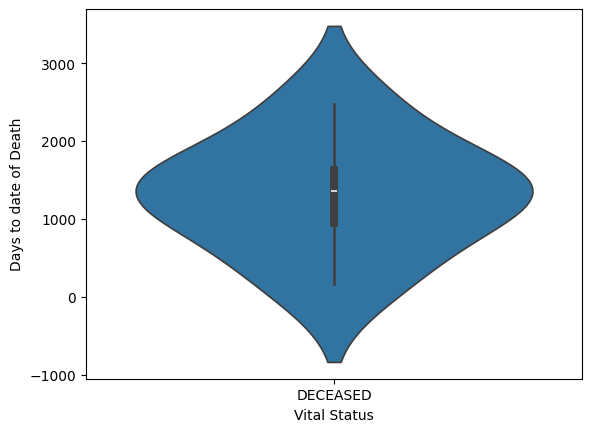

In [151]:
clinical_data.head()
df_dead = clinical_data[clinical_data['Vital Status'] == 'DECEASED']

sns.violinplot(x='Vital Status', y='Days to date of Death', data=df_dead)

<font color = #d14d0f>**QUESTION 15**:</font>
In many cancers, the best predictor of survival is metastasis. Detecting a cancer before metastasis can lead to much higher survival rates than cancers detected after metastasis. 

In this dataset, explore how metastasis influences prognosis. Is metastasis status a good predictor of survival? If not, is there a better predictor in the data?

<font color = #d14d0f>**QUESTION 15a**:</font>
What is the correlation between metastasis and survival?

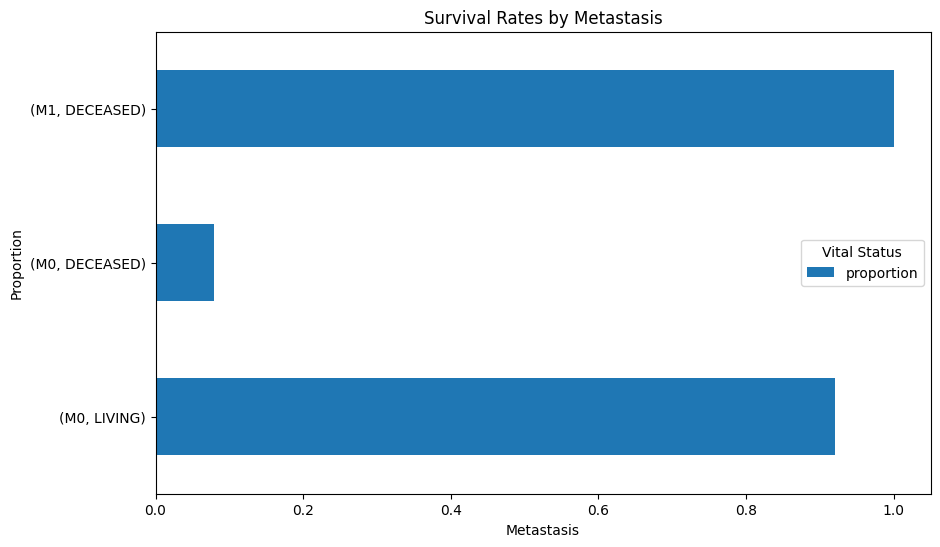

In [152]:
#Enter Code Solution Here
survival_rates = survival_rates = clinical_data.groupby('Metastasis')['Vital Status'].value_counts(normalize=True)

# Plot the bar chart
survival_rates.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Survival Rates by Metastasis')
plt.xlabel('Metastasis')
plt.ylabel('Proportion')
plt.legend(title='Vital Status')
plt.show()

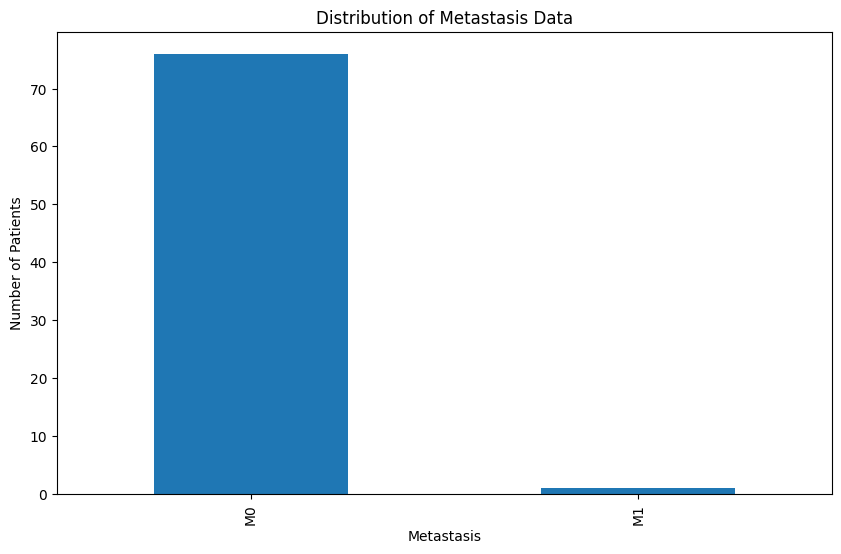

In [153]:
# Show the value counts
metastasis_data_distribution = clinical_data['Metastasis'].value_counts()

metastasis_data_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Metastasis Data')
plt.xlabel('Metastasis')
plt.ylabel('Number of Patients')
plt.show()

***Answer 15a:*** Our first plot would suggest that there seems to be some kind of correlation between the degree to which the cancer has metastasized. It implies that those with M1 level cancer metastasis are more likely to die relative to those who have M0 level cancer metastasis. However, further inspection would show that the dataset in this case is quite skewed. I believe it would be unwise to draw conclusions without more data points to inform our inference and thus I cannot make a conclusion about the correlation between metastasis and survivability. This may be due to the nature of the problem, but the size of the data is relatively small so I think we shouldn't rush to conclusions just yet!

<font color = #d14d0f>**QUESTION 15b**:</font>
What column is best correlated with survival?


In [154]:
clinical_data.head()

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Node,Node-Coded,Metastasis,AJCC Stage,Vital Status,Days to date of Death,Age Category
0,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,N0,Negative,M0,Stage IIA,DECEASED,754.0,< 50
1,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,N1,Positive,M0,Stage IIB,DECEASED,1692.0,>= 50
2,TCGA-A7-A0CE,FEMALE,57,Negative,Negative,Negative,T2,N0,Negative,M0,Stage IIA,LIVING,NaN,>= 50
3,TCGA-D8-A142,FEMALE,74,Negative,Negative,Negative,T3,N0,Negative,M0,Stage IIB,LIVING,NaN,>= 50
4,TCGA-AO-A0J6,FEMALE,61,Negative,Negative,Negative,T2,N0,Negative,M0,Stage IIA,LIVING,NaN,>= 50


Vital Status                           1.000000
Metastasis                             0.362738
Age at Initial Pathologic Diagnosis    0.212381
Node-Coded                             0.139645
AJCC Stage                             0.081080
Age Category                           0.076208
Node                                   0.073621
ER Status                              0.017733
PR Status                              0.008270
Gender                                -0.051640
HER2 Final Status                     -0.055375
Tumor                                 -0.063131
Days to date of Death                       NaN
Name: Vital Status, dtype: float64


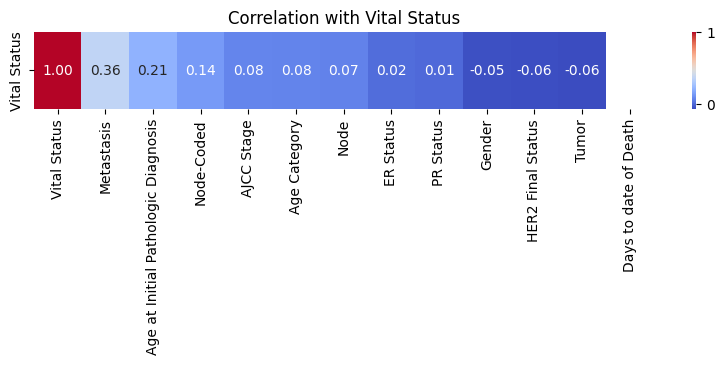

In [ ]:
from sklearn.preprocessing import LabelEncoder

# to figure out which is best correlated with 'Vital Status', i need to convert the categorical columns to numeric using one-hot encoding as i would normally do for ml problems
df_copy = clinical_data.copy() # i dont wanna change the original dataframe
df_copy['Vital Status'] = df_copy['Vital Status'].map({'LIVING': 0, 'DECEASED': 1})
categorical_columns = ['Gender', 'ER Status', 'PR Status', 'HER2 Final Status', 'Tumor', 'Node', 'Node-Coded', 'AJCC Stage', 'Metastasis', 'Age Category']

# so basicaly this label encoder will convert the categorical columns to numeric by assigning a unique number to each category!
label_encoder = LabelEncoder()
for col in categorical_columns:
    df_copy[col] = label_encoder.fit_transform(df_copy[col])

# Calculate the correlation matrix
df_copy.drop(columns=['Complete TCGA ID'], inplace=True)
correlation_matrix = df_copy.corr()

# Extract the correlation with 'Vital Status'
vital_status_correlation = correlation_matrix['Vital Status'].sort_values(ascending=False)
print(vital_status_correlation)

# plt heatmap
plt.figure(figsize=(10, 1))
sns.heatmap(vital_status_correlation.to_frame().T, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation with Vital Status')
plt.show()

***Answer 15b:*** 
**Plot explanation**
Ok so what I've done here is something that I normally do for ML projects for feature engineering and feature selection. Above, I converted all the categorical columns to a numerical column using the label encoder from sci-kit learn. The main reason for doing this is simply so that I can calculate the pairwise pearson correlation between the feature columns selected above with the Vital Status. I then take the correlation matrix, sort by most positively correlated and pass that into my heatmap plotted by seaborn. **The correlation heat map shows that the column best correlated with vital status is Metastasis followed by the patients age at initial pathological diagnosis.**

<font color = #d14d0f>**QUESTION 15c**:</font>
Provide a short answer about how important metastasis is in this dataset.


In [ ]:
#Enter Code Solution Here
clinical_data["Metastasis"].value_counts()

Metastasis
M0    76
M1     1
Name: count, dtype: int64

***Answer 15c:*** The dataset would imply that metastasis is incredibly important as a lead feature that may correlate with the vital status of a patient. I think it would be valuable to get more data such that our data is less skewed. However, I also acknowledge that this could simply be an anomaly problem where class imbalance in data is inherent due to the nature of the problem. I believe more data should be collected to make a more concrete conclusion, but with the available data and our analysis above, we have some reason to believe that metastasis may influence patient survivability!

***
## 5. Extra Credit Mini-Projects

Most assignments in this course will include optional extra credit questions. These questions are designed as starting points for students to explore more free-form mini projects. Therefore, there is no skeleton code and minimal guidance for these questions. Students are welcome to go beyond the scope of the question or adapt the question as necessary to answer their own scientific questions of interest. You are welcome to create as many coding cells as you would like for these mini-projects. In order to get extra credit, students should make a reasonable attempt (as judged by the grader) on at least one question and write a brief report.

Write a summary on your methodology and your findings, highlighting key results and any interesting observations. The length of the report does not matter, as long as it answers all of the following questions:
- What was your scientific goal with this project?
- What methods did you use and why?
- What were the key results you found for each method you implemented?
- Were there any limitations in your methods?
- What additional observations or comments can you make on your findings? What is the greater biological relevance or implication?
- Are there any additional questions you would want to explore?

<font color = #d14d0f>**EC Mini-Project A: Proteomics**</font>

Researchers conducted iTRAQ proteome profiling on each patients in `clinical_data`, gathering expression values for ~12,000 proteins for each sample in the dataset `cancer_proteomes.csv`. Each row in `cancer_proteomes.csv` corresponds to a patient, and each column corresponds the expression level of a protein. First, clean the proteomics dataset as you see appropriate. Merge the data with the patient data - a patient can be identified by their TCGA ID. Explore how protein expression levels are different amongst different categorical classifications of patients (e.g AJCC Status, Tumor, Node, etc.). Identify proteins that show drastic differences by classification.

<font color = #d14d0f>**EC Mini-Project B: Data Visualization and Interpretation**</font>

Conduct an independent exploration on `clinical_data`. Generate some interesting visualizations and report on the significance of those visualizations. To obtain more quantitative data, you may also want to use `cancer_proteomes.csv` (read Mini-Project A description).

In [ ]:
#YOUR CODE HERE. ADD ADDITIONAL CODE CELLS AS NEEDED.

**EXTRA CREDIT REPORT: [insert project choice here]** <br>

*DOUBLE-CLICK TO EDIT THIS CELL AND TYPE YOUR REPORT*

***
### Congratulations! You have finished Lab 6!
***